In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline, BSpline
from scipy.interpolate import interp1d

In [2]:
data = pd.read_excel('./karpov smooth curve data.xlsx')
data.shape

(19, 13)

In [3]:
data.head(19)

,Fn,h/T= 1.5,h/T= 2,h/T= 2.5,h/T= 3,h/T= 3.5,h/T= 4,h/T= 5,h/T= 6,h/T= 7,h/T= 8,h/T= 9,h/T= 10
0,0.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0000,1.000,1.000,1.000,1.000
1,0.1,0.990,1.000,0.999,1.000,1.000,1.000,1.000,1.0000,1.000,1.000,1.000,1.000
2,0.2,0.980,1.000,0.999,1.000,1.000,1.000,1.000,1.0000,1.000,1.000,1.000,1.000
3,0.3,0.960,0.995,0.999,1.000,1.000,1.000,1.000,1.0000,1.000,1.000,1.000,1.000
4,0.4,0.940,0.980,0.995,1.000,1.000,1.000,1.000,1.0000,1.000,1.000,1.000,1.000
5,0.5,0.900,0.940,0.960,0.980,0.985,0.990,0.995,0.9960,1.000,1.000,1.000,1.000
6,0.6,0.800,0.875,0.905,0.940,0.950,0.960,0.975,0.9800,0.990,0.995,1.000,1.000
7,0.7,0.650,0.770,0.815,0.860,0.875,0.901,0.935,0.9550,0.970,0.975,0.975,0.980
8,0.8,0.480,0.630,0.705,0.770,0.800,0.820,0.865,0.8900,0.910,0.920,0.925,0.930
9,0.9,0.390,0.530,0.625,0.715,0.745,0.775,0.825,0.8500,0.870,0.885,0.900,0.910


In [4]:
a=data[['h/T= 1.5','h/T= 2','h/T= 2.5','h/T= 3','h/T= 3.5','h/T= 4','h/T= 5','h/T= 6','h/T= 7','h/T= 8','h/T= 9','h/T= 10']]

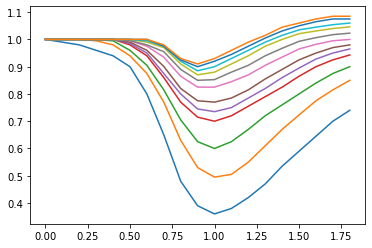

In [5]:
# plot the not smooth curves first: a** as a function of the depth Froude number (Karpov method)
plt.plot(data['Fn'],a)

In [6]:
# create smooth curves
x=data['Fn']
#define f1, spline, make the lines smooth

f1=interp1d(x,data['h/T= 1.5'],kind='linear')
spl2= make_interp_spline(x,data['h/T= 2'], k=3)
spl3= make_interp_spline(x,data['h/T= 2.5'], k=3)
spl4= make_interp_spline(x,data['h/T= 3'], k=3)
spl5=make_interp_spline(x,data['h/T= 3.5'], k=3)
spl6=make_interp_spline(x,data['h/T= 4'], k=3)
#f6=interp1d(x,data['h/T= 4'],kind='linear')
spl7=make_interp_spline(x,data['h/T= 5'], k=3)
spl8=make_interp_spline(x,data['h/T= 6'], k=3)
spl9=make_interp_spline(x,data['h/T= 7'], k=3)
spl10=make_interp_spline(x,data['h/T= 8'], k=3)
spl11=make_interp_spline(x,data['h/T= 9'], k=3)
spl12=make_interp_spline(x,data['h/T= 10'], k=3)

# set smooth degree by dividng x_axis into many more points
x_new = np.linspace(x.min(), x.max(), 200) 
new=pd.DataFrame(x_new)
# get new smooth lines
a1_new=f1(x_new)
a2_new = spl2(x_new)
a3_new = spl3(x_new)
a4_new = spl4(x_new)
a5_new = spl5(x_new)
a6_new = spl6(x_new)
a7_new = spl7(x_new)
a8_new = spl8(x_new)
a9_new = spl9(x_new)
a10_new = spl10(x_new)
a11_new = spl11(x_new)
a12_new = spl12(x_new)
# creat dataframe for new lines data
new['a1_new']=a1_new 
new['a2_new']=a2_new  
new['a3_new']=a3_new 
new['a4_new']=a4_new  
new['a5_new']=a5_new 
new['a6_new']=a6_new  
new['a7_new']=a7_new 
new['a8_new']=a8_new  
new['a9_new']=a9_new 
new['a10_new']=a10_new  
new['a11_new']=a11_new  
new['a12_new']=a12_new  


In [7]:
new.head(200)

,0,a1_new,a2_new,a3_new,a4_new,a5_new,a6_new,a7_new,a8_new,a9_new,a10_new,a11_new,a12_new
0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.009045,0.999095,0.999841,0.999797,0.999948,0.999962,0.999981,0.999995,0.999998,1.000008,1.000003,0.999996,0.999998
2,0.018090,0.998191,0.999727,0.999622,0.999911,0.999935,0.999968,0.999991,0.999997,1.000014,1.000005,0.999994,0.999996
3,0.027136,0.997286,0.999654,0.999474,0.999887,0.999918,0.999959,0.999989,0.999996,1.000018,1.000006,0.999992,0.999995
4,0.036181,0.996382,0.999617,0.999350,0.999875,0.999909,0.999955,0.999987,0.999996,1.000020,1.000007,0.999991,0.999994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.763819,0.725528,0.837078,0.892423,0.937013,0.959832,0.978114,0.999716,1.022163,1.044606,1.058559,1.076512,1.086326
196,1.772864,0.729146,0.840241,0.894488,0.938552,0.961125,0.978797,0.999978,1.022520,1.045057,1.059015,1.076311,1.086143
197,1.781910,0.732764,0.843443,0.896442,0.940061,0.962414,0.979343,1.000117,1.022782,1.045444,1.059410,1.075995,1.085863
198,1.790955,0.736382,0.846693,0.898280,0.941542,0.963703,0.979747,1.000127,1.022944,1.045759,1.059740,1.075560,1.085482


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


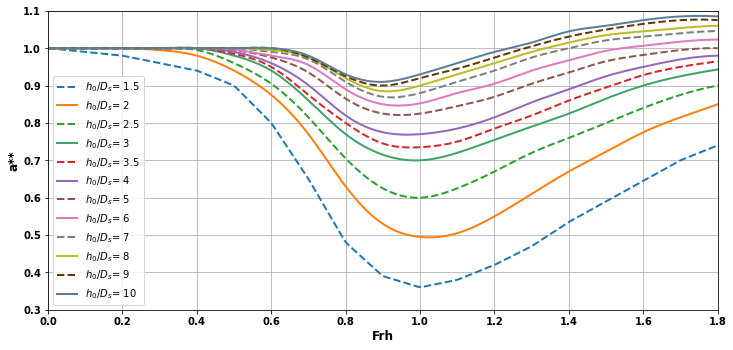

In [13]:
# # plot the smooth curves: a** as a function of the depth Froude number (Karpov method) 
plt.figure(figsize = (12,5.5))
plt.plot(new.iloc[:,0],new.iloc[:,1],'--',linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,2],linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,3],'--',linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,4],color='#40a368',linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,5],'--',linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,6],linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,7],'--',linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,8],linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,9],'--',linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,10],linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,11],'--',color='#653700',linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,12],color='#5a7d9a',linewidth=2)
#plt.legend(['h/T= 1.5','h/T= 2','h/T= 2.5','h/T= 3','h/T= 3.5','h/T= 4','h/T= 5','h/T= 6','h/T= 7','h/T= 8','h/T= 9','h/T= 10'])
plt.legend(['$h_0/D_s$= 1.5','$h_0/D_s$= 2','$h_0/D_s$= 2.5','$h_0/D_s$= 3','$h_0/D_s$= 3.5','$h_0/D_s$= 4','$h_0/D_s$= 5','$h_0/D_s$= 6','$h_0/D_s$= 7','$h_0/D_s$= 8','$h_0/D_s$= 9','$h_0/D_s$= 10'],loc='lower left')
# plt.plot(new.iloc[:,0],new.iloc[:,[1,3,5,7,9,11]],'--',linewidth=2)
# plt.plot(new.iloc[:,0],new.iloc[:,[2,4,6,8,10,12]],linewidth=2.5)
#plt.legend(['h/T= 1.5','h/T= 2.5','h/T= 3.5','h/T= 5','h/T= 7','h/T= 9','h/T= 2','h/T= 3','h/T= 4','h/T= 6','h/T= 8','h/T= 10'])
plt.grid(True)
plt.xlim(0, 1.8)
plt.ylim(0.3, 1.1)
plt.xlabel('Frh',fontsize=12,weight='bold',labelpad=3)
plt.ylabel('a**',fontsize=12,weight='bold',labelpad=3)
#plt.title('a** as a function of the depth Froude number (Karpov method)')
plt.xticks(weight = 'bold',)
plt.yticks( weight = 'bold')
plt.savefig('PartIV-05-03.eps',bbox_inches = 'tight',dpi=600, format='eps') 
plt.savefig('PartIV-05-03.pdf',bbox_inches = 'tight',dpi=600, format='pdf') 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


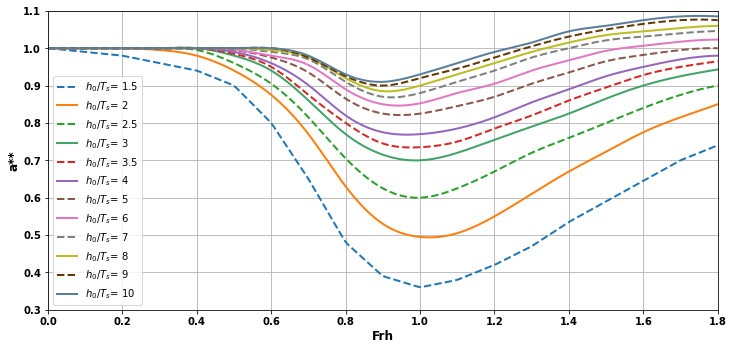

In [14]:
# # plot the smooth curves: a** as a function of the depth Froude number (Karpov method) 
plt.figure(figsize = (12,5.5))
plt.plot(new.iloc[:,0],new.iloc[:,1],'--',linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,2],linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,3],'--',linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,4],color='#40a368',linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,5],'--',linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,6],linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,7],'--',linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,8],linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,9],'--',linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,10],linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,11],'--',color='#653700',linewidth=2)
plt.plot(new.iloc[:,0],new.iloc[:,12],color='#5a7d9a',linewidth=2)
#plt.legend(['h/T= 1.5','h/T= 2','h/T= 2.5','h/T= 3','h/T= 3.5','h/T= 4','h/T= 5','h/T= 6','h/T= 7','h/T= 8','h/T= 9','h/T= 10'])
plt.legend(['$h_0/T_s$= 1.5','$h_0/T_s$= 2','$h_0/T_s$= 2.5','$h_0/T_s$= 3','$h_0/T_s$= 3.5','$h_0/T_s$= 4','$h_0/T_s$= 5','$h_0/T_s$= 6','$h_0/T_s$= 7','$h_0/T_s$= 8','$h_0/T_s$= 9','$h_0/T_s$= 10'],loc='lower left')
# plt.plot(new.iloc[:,0],new.iloc[:,[1,3,5,7,9,11]],'--',linewidth=2)
# plt.plot(new.iloc[:,0],new.iloc[:,[2,4,6,8,10,12]],linewidth=2.5)
#plt.legend(['h/T= 1.5','h/T= 2.5','h/T= 3.5','h/T= 5','h/T= 7','h/T= 9','h/T= 2','h/T= 3','h/T= 4','h/T= 6','h/T= 8','h/T= 10'])
plt.grid(True)
plt.xlim(0, 1.8)
plt.ylim(0.3, 1.1)
plt.xlabel('Frh',fontsize=12,weight='bold',labelpad=3)
plt.ylabel('a**',fontsize=12,weight='bold',labelpad=3)
#plt.title('a** as a function of the depth Froude number (Karpov method)')
plt.xticks(weight = 'bold',)
plt.yticks( weight = 'bold')
plt.savefig('PartIV-05-03 for paper.eps',bbox_inches = 'tight',dpi=600, format='eps') 
plt.savefig('PartIV-05-03 for paper.pdf',bbox_inches = 'tight',dpi=600, format='pdf') 